# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [259]:
#%pip install --upgrade plotly

###  Import Statements


In [260]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [261]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [262]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [263]:
with open ("NLSY97_Variable_Names_and_Descriptions.csv", "r") as f:
  var_names = f.read()
  print(var_names)

Personal variables,Variable Type,Description
FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
MALE,D,"Sex of respondent (1 if male, 0 if female)"
,,
Ethnicity:,,
ETHBLACK,D,Black
ETHHISP,D,Hispanic
ETHWHITE,D,"Non-black, non-hispanic"
,,
AGE,C,Age in 2011
BYEAR,C,Year of birth
HEIGHT,C,"Height, in inches, in 2004"
WEIGHT04,C,"Weight, in pounds, in 2004"
WEIGHT11,C,"Weight, in pounds, in 2011"
S,C,Years of schooling (highest grade completed as of 2011)
,,
Highest educational qualification:,,
EDUCPROF,D,Professional degree
EDUCPHD,D,Doctorate
EDUCMAST,D,Master's degree
EDUCBA,D,Bachelor's degree
EDUCAA,D,Associate's (two-year college) degree
EDUCHSD,D,High school diploma
EDUCGED,D,General Educational Development certificate (HSD equivalence)
EDUCDO,D,High school drop-out
,,
Marital status,,
SINGLE,D,"Single, never married"
MARRIED,D,"Married, spouse present"
COHABIT,D,Cohabiting
OTHSING,D,Other single
,,
Scaled score on a component of the ASVAB battery,,
ASVABAR,C,Arithmetic reasoni

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [264]:
df_data.shape

(2000, 96)

In [265]:
print(f"The dataframe has {df_data.shape[0]} rows and {df_data.shape[1]} columns.\n")
print(f"The dataframe column names are:  {df_data.columns}")

The dataframe has 2000 rows and 96 columns.

The dataframe column names are:  Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE

In [266]:
print(f"Any NaN values in the dataframe?  {df_data.isna().values.any()}")
print(f"Any duplicate values in the dataframe?  {df_data.duplicated().values.any()}")

Any NaN values in the dataframe?  True
Any duplicate values in the dataframe?  True


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [267]:
df_data.drop_duplicates(inplace=True)
df_data.shape

(1487, 96)

## Descriptive Statistics

In [268]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

In [269]:
df_data.sample(5)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
938,924,17.31,16,7.85,1,0,1982,29,23.00,"56,484.00",...,1,0,0,1,0,0,1,0,0,0
423,248,15.38,16,5.52,1,0,1983,28,26.00,"24,850.00",...,1,1,0,0,0,0,1,0,0,0
1140,3193,35.03,17,3.33,0,1,1984,27,31.00,"105,000.00",...,1,0,0,1,0,0,0,1,0,0
153,4294,19.66,16,5.40,0,1,1982,29,29.00,"73,000.00",...,1,0,0,1,0,0,0,1,0,0
780,3483,16.00,13,11.67,1,0,1980,31,28.00,"37,030.00",...,1,0,0,1,0,0,1,0,0,0


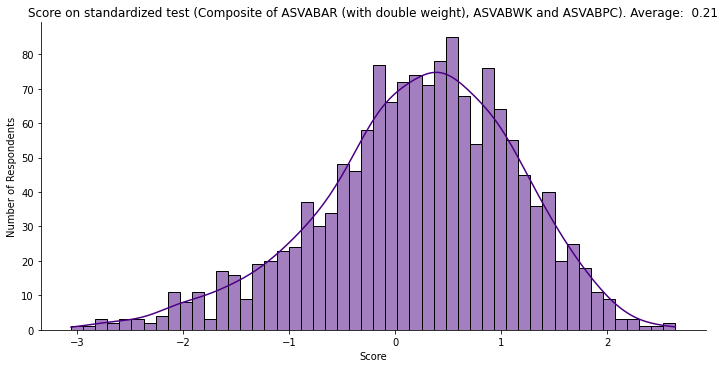

In [270]:
# ASVABC - Performance on standardized test (Composite of ASVABAR (with double weight), ASVABWK and ASVABPC)
sns.displot(df_data.ASVABC, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='indigo')

plt.title(f"Score on standardized test (Composite of ASVABAR (with double weight), ASVABWK and ASVABPC). Average:  {(df_data.ASVABC.mean()):.2}")
plt.xlabel('Score')
plt.ylabel('Number of Respondents')

plt.show()

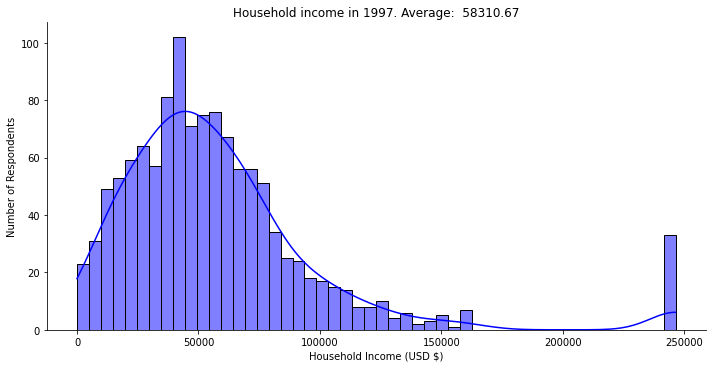

In [271]:
# HHINC97 - Household income in 1997
sns.displot(df_data.HHINC97, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='blue')

plt.title(f"Household income in 1997. Average:  {(df_data.HHINC97.mean()):.7}")
plt.xlabel('Household Income (USD $)')
plt.ylabel('Number of Respondents')

plt.show()

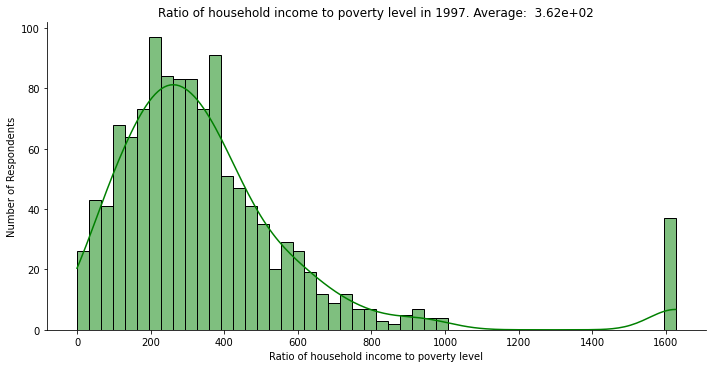

In [272]:
# POVRAT97 - Ratio of household income to poverty level in 1997
sns.displot(df_data.POVRAT97, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='green')

plt.title(f"Ratio of household income to poverty level in 1997. Average:  {(df_data.POVRAT97.mean()):.3}")
plt.xlabel('Ratio of household income to poverty level')
plt.ylabel('Number of Respondents')

plt.show()

In [273]:
df_data.POVRAT97.describe()

count   1,203.00
mean      362.26
std       294.23
min         0.00
25%       190.50
50%       302.00
75%       441.00
max     1,627.00
Name: POVRAT97, dtype: float64

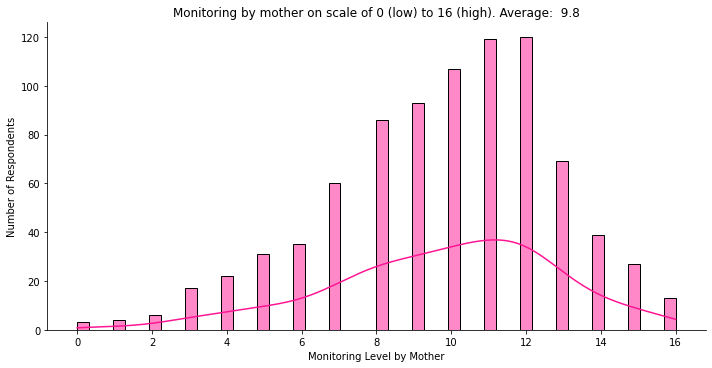

In [274]:
# PRMONM - Monitoring by mother on scale of 0 (low) to 16 (high)
sns.displot(df_data.PRMONM, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='deeppink')

plt.title(f"Monitoring by mother on scale of 0 (low) to 16 (high). Average:  {(df_data.PRMONM.mean()):.2}")
plt.xlabel('Monitoring Level by Mother')
plt.ylabel('Number of Respondents')

plt.show()

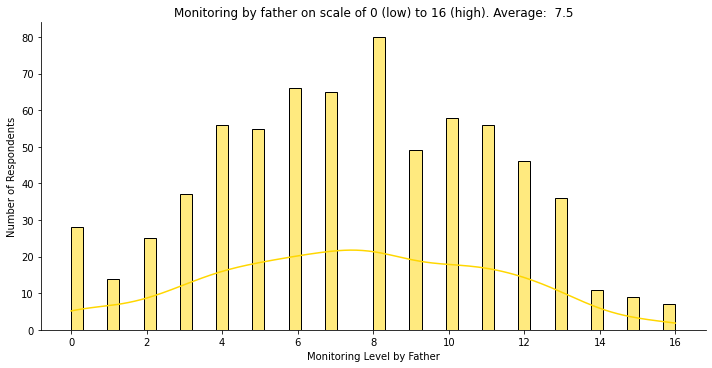

In [275]:
# PRMONF - Monitoring by father on scale of 0 (low) to 16 (high)
sns.displot(df_data.PRMONF, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='gold')

plt.title(f"Monitoring by father on scale of 0 (low) to 16 (high). Average:  {(df_data.PRMONF.mean()):.2}")
plt.xlabel('Monitoring Level by Father')
plt.ylabel('Number of Respondents')

plt.show()

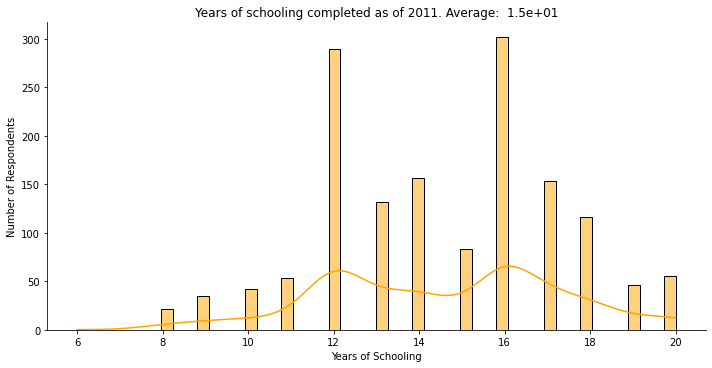

In [276]:
# S -Years of schooling completed as of 2011
sns.displot(df_data.S, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='orange')

plt.title(f"Years of schooling completed as of 2011. Average:  {(df_data.S.mean()):.2}")
plt.xlabel('Years of Schooling')
plt.ylabel('Number of Respondents')

plt.show()

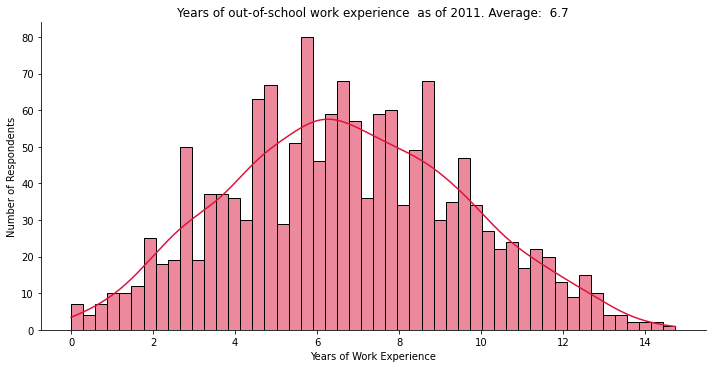

In [277]:
# EXP - Years of out-of-school work experience as of 2011
sns.displot(df_data.EXP, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='crimson')

plt.title(f"Years of out-of-school work experience  as of 2011. Average:  {(df_data.EXP.mean()):.2}")
plt.xlabel('Years of Work Experience')
plt.ylabel('Number of Respondents')

plt.show()

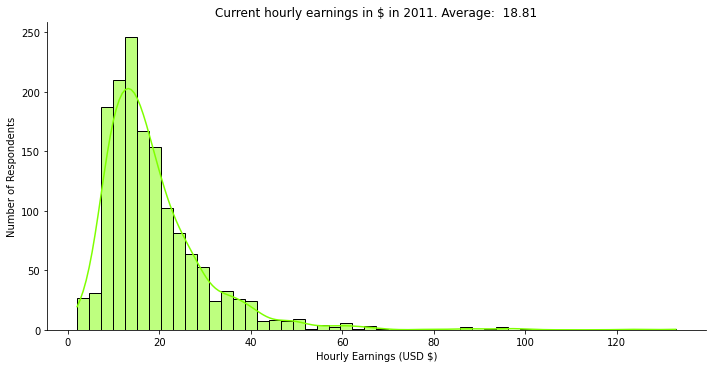

In [278]:
# EARNINGS - Current hourly earnings in $ in 2011
sns.displot(df_data.EARNINGS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='chartreuse')

plt.title(f"Current hourly earnings in $ in 2011. Average:  {(df_data.EARNINGS.mean()):.4}")
plt.xlabel('Hourly Earnings (USD $)')
plt.ylabel('Number of Respondents')

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [279]:
df_data_features = df_data.filter(items=["S", "EXP"])
df_data_features

,S,EXP
0,12,9.71
1,17,5.71
2,14,9.94
3,18,1.54
4,15,2.94
...,...,...
1984,12,10.83
1989,12,9.37
1991,17,6.29
1994,12,9.12


In [280]:
target = df_data.EARNINGS
features = df_data_features

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [281]:
X_train

,S,EXP
179,14,9.60
142,16,7.60
1626,10,6.33
707,12,13.54
1288,18,4.67
...,...,...
1762,17,5.77
1660,9,10.27
527,14,9.71
1263,16,5.25


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

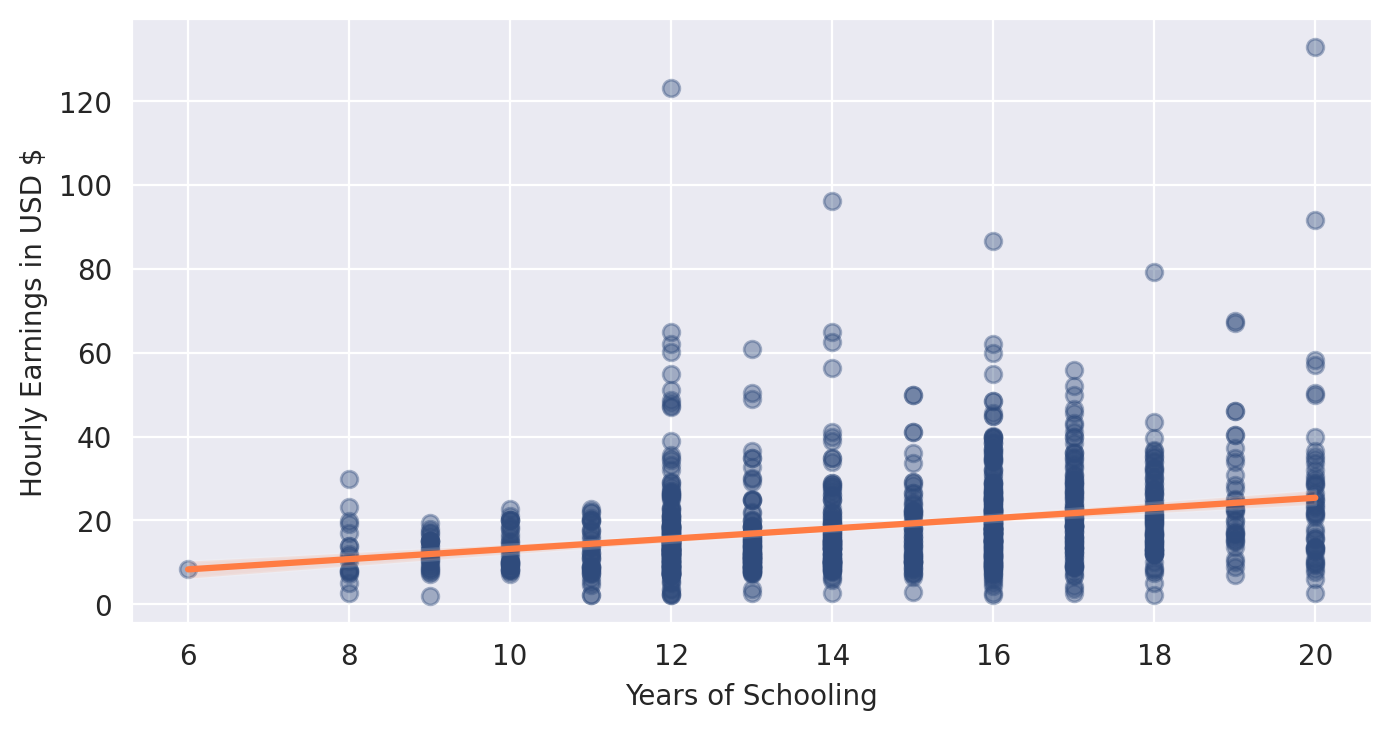

In [282]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(x=X_train.S,
                   y=y_train,
                   scatter_kws = {'alpha': 0.4, 'color': '#2f4b7c'},
                   line_kws = {'color': '#ff7c43'})
  ax.set(xlabel='Years of Schooling',
         ylabel='Hourly Earnings in USD $')

In [283]:
# Need to reshape array as 2D array, otherwise you get an error
X_train_array = np.array(X_train.S).reshape(-1, 1)
X_train_array.shape

(1189, 1)

In [284]:
# Run regression with scikit-learn
regression = LinearRegression()
regression.fit(X_train_array, y_train)
# r-squared (measure of how well our model fits our data)
r_squared = regression.score(X_train_array, y_train)

print(f'Training data r-squared:  {r_squared:.2}')  # 8.1% - very bad

Training data r-squared:  0.081


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [285]:
# Get the slope - this is how much the earnings prediction changes in $ for each additional year of schooling.
slope = regression.coef_
print(f"One can expect to earn {slope[0]:.3} extra dollars/hour for an additional year of schooling.")
# Slope is positive, which is expected.

One can expect to earn 1.22 extra dollars/hour for an additional year of schooling.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [286]:
predicted_vals = regression.predict(X_train_array)
residuals = (y_train - predicted_vals)

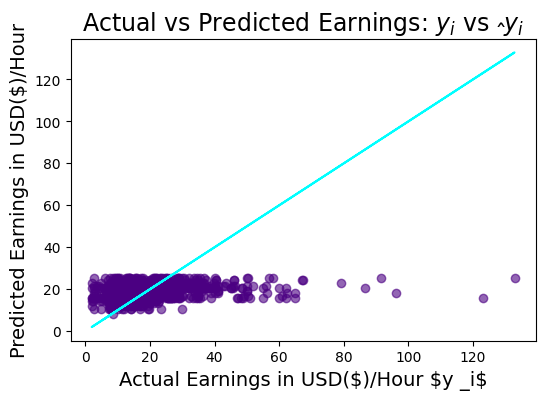

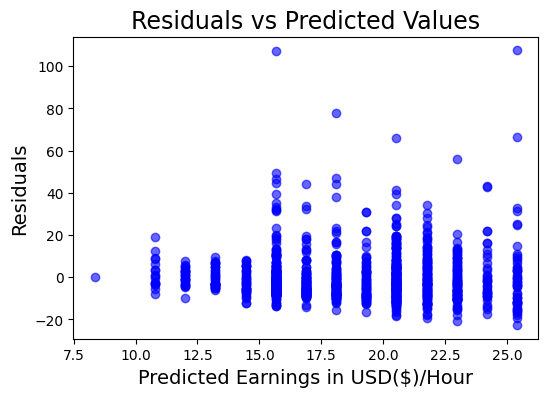

In [287]:
# Original Regression of Actual vs. Predicted Earnings Values
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings in USD($)/Hour', fontsize=14)
plt.ylabel('Predicted Earnings in USD($)/Hour', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='blue', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings in USD($)/Hour', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# The residuals get greater and cover a wider range as the predicted earnings get higher.

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [288]:
# Run regression using both features S (years of schooling) and EXP (work experience)
regression_multivar = LinearRegression()
regression_multivar.fit(X_train, y_train)
# r-squared (measure of how well our model fits our data)
r_squared_multivar = regression_multivar.score(X_train, y_train)

print(f'Training data r-squared for regression 2, multivariable regression ' \
      f'using both S (years of schooling) and EXP (work experience):\n{r_squared_multivar:.2}')  # 12% - slightly better 

Training data r-squared for regression 2, multivariable regression using both S (years of schooling) and EXP (work experience):
0.12


### Evaluate the Coefficients of the Model

In [289]:
# Get the slope - this is how much the earnings prediction changes in $ for each additional year of schooling.
slope = regression_multivar.coef_
slope
# Both coefficents are positive, which is expected and makes sense. More years of school and more work experience mean more money.

array([1.79422175, 0.97900689])

### Analyse the Estimated Values & Regression Residuals

In [290]:
predicted_vals_multivar = regression2.predict(X_train)
residuals_multivar = (y_train - predicted_vals_multivar)

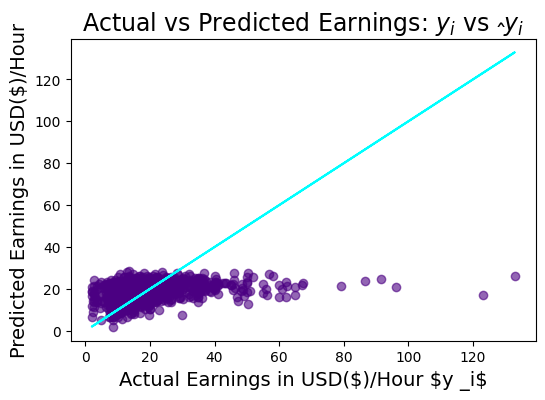

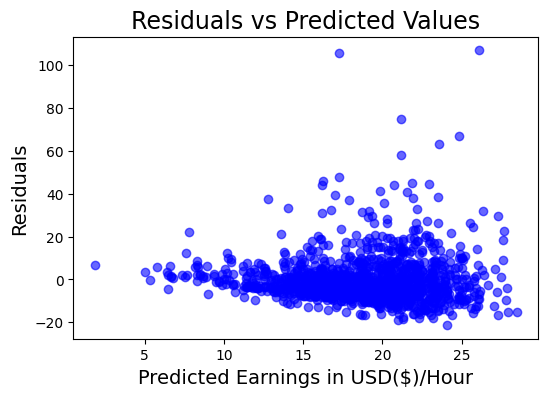

In [291]:
# 2nd Multivariable Regression of Actual vs. Predicted Earnings Values
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals_multivar, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings in USD($)/Hour', fontsize=14)
plt.ylabel('Predicted Earnings in USD($)/Hour', fontsize=14)
plt.show()

# Residuals vs Predicted values for 2nd (Multivariable) Regression
plt.figure(dpi=100)
plt.scatter(x=predicted_vals_multivar, y=residuals_multivar, c='blue', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings in USD($)/Hour', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# The residuals form a healthier cluster now since they are not limited to whole numbers for years of schooling.
# There are still some big outliers.

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [292]:
# Create a dataframe for the stats for which we want to make a prediction
earnings_stats = pd.DataFrame({'S': 16, 'EXP': 5}, index=[0])
earnings_stats

,S,EXP
0,16,5


In [293]:
# Make prediction
earnings_estimate = regression_multivar.predict(earnings_stats)[0]
print(f'The earnings prediction is ${earnings_estimate:.3}/hour.')

The earnings prediction is $19.7/hour.


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [471]:
# Adding additional features including more features about the respondent's job/industry/org type and their location, 
# since these are some of the biggest predictors of earnings
df_data_more_features = df_data.filter(items=["EARNINGS", "S", "EXP", "MALE", "URBAN",
                                              "MSA11NO", "MSA11NCC", "MSA11CC", "MARRIED", 
                                              "CATGOV", "CATPRI", "CATSE", "CATNPO", "TENURE",
                                              "EDUCPHD", "EDUCMAST", "EDUCBA", "EDUCHSD", "EDUCDO"])

In [472]:
target_v2 = df_data_more_features.EARNINGS
df_data_more_features.drop('EARNINGS', inplace=True, axis=1)
df_data_more_features

,S,EXP,MALE,URBAN,MSA11NO,MSA11NCC,MSA11CC,MARRIED,CATGOV,CATPRI,CATSE,CATNPO,TENURE,EDUCPHD,EDUCMAST,EDUCBA,EDUCHSD,EDUCDO
0,12,9.71,1,1,0,0,1,1,0,1,0,0,4.77,0,0,0,1,0
1,17,5.71,1,2,0,1,0,1,0,0,0,0,9.06,0,0,1,0,0
2,14,9.94,1,1,0,0,1,0,0,1,0,0,4.98,0,0,0,1,0
3,18,1.54,1,1,0,1,0,1,1,0,0,0,1.02,0,1,0,0,0
4,15,2.94,1,1,0,0,1,0,0,1,0,0,2.35,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,12,10.83,0,0,0,0,1,0,0,1,0,0,2.15,0,0,0,1,0
1989,12,9.37,0,1,0,1,0,0,0,1,0,0,1.46,0,0,0,1,0
1991,17,6.29,0,0,0,1,0,1,1,0,1,0,0.10,0,0,1,0,0
1994,12,9.12,0,1,0,1,0,1,0,1,0,0,6.63,0,0,0,1,0


In [473]:
features_v2 = df_data_more_features  # now have 7 features 

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(features_v2, 
                                                                target_v2, 
                                                                test_size=0.2, 
                                                                random_state=10)

In [474]:
# Run regression using all 7 features
regression_v2 = LinearRegression()
regression_v2.fit(X_train_v2, y_train_v2)
# r-squared (measure of how well our model fits our data)
r_squared_v2 = regression_v2.score(X_train_v2, y_train_v2)

# I was able to get up to a slightly better r-squared value of over 20%.
print('Training data r-squared for regression v2 with additional features:\n ' \
     f'{r_squared_v2:.4}')

Training data r-squared for regression v2 with additional features (7 total):
 0.2067


In [475]:
features_v2.columns

Index(['S', 'EXP', 'MALE', 'URBAN', 'MSA11NO', 'MSA11NCC', 'MSA11CC',
       'MARRIED', 'CATGOV', 'CATPRI', 'CATSE', 'CATNPO', 'TENURE', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCHSD', 'EDUCDO'],
      dtype='object')

In [476]:
slope = regression_v2.coef_
slope

array([ 1.80673329,  0.7698704 ,  3.83403094, -0.2690645 , -7.10986533,
       -5.11008213, -4.33705358,  1.41100648,  0.69907138,  2.06628331,
        9.92503908,  0.21330424,  0.44769826,  9.6914992 ,  0.20362784,
       -0.77724494, -1.17825072, -0.45451224])

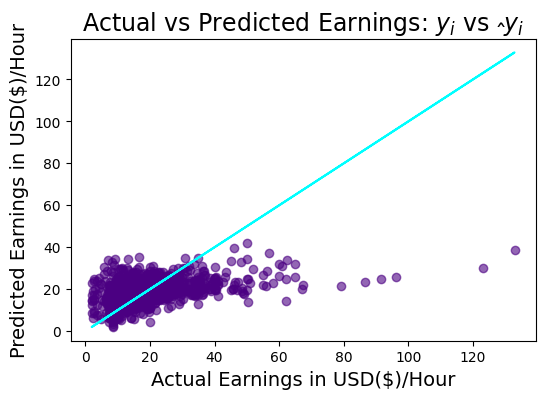

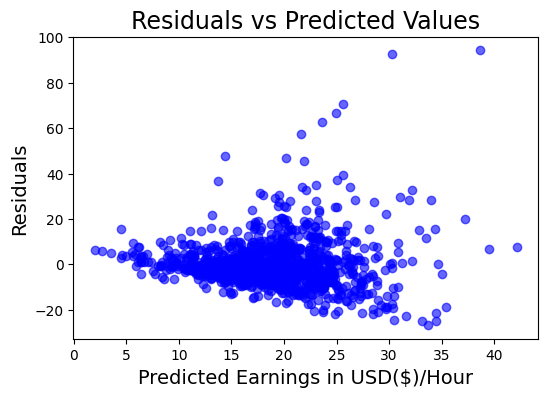

In [477]:
predicted_vals_v2 = regression_v2.predict(X_train_v2)
residuals_v2 = (y_train_v2 - predicted_vals_v2)

# Attempting to improve the model
plt.figure(dpi=100)
plt.scatter(x=y_train_v2, y=predicted_vals_v2, c='indigo', alpha=0.6)
plt.plot(y_train_v2, y_train_v2, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings in USD($)/Hour', fontsize=14)
plt.ylabel('Predicted Earnings in USD($)/Hour', fontsize=14)
plt.show()

# Residuals vs Predicted values for improved model
plt.figure(dpi=100)
plt.scatter(x=predicted_vals_v2, y=residuals_v2, c='blue', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings in USD($)/Hour', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# The residuals form a healthier cluster now since they are not limited to whole numbers for years of schooling.
# There are still some big outliers.